In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import models, layers
import os
from os import listdir
import numpy as np
import matplotlib.pyplot as plt


In [2]:
mobile=keras.applications.mobilenet.MobileNet()

In [3]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [4]:
data = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,brightness_range=[0.3,1.6],rotation_range=40, fill_mode='nearest',horizontal_flip=True, vertical_flip=True)
train_dataset = data.flow_from_directory("D:/bacteria_classification/data_Augment0/", target_size=(224,224),class_mode="sparse")
# sparse is used when categorical classification  ( binary is used with binary classification )
test_dataset = data.flow_from_directory("D:/bacteria_classification/test_Augment0/", target_size=(256, 256), class_mode="sparse")

Found 500 images belonging to 5 classes.
Found 293 images belonging to 5 classes.


In [12]:
model=models.Sequential()
for layer in mobile.layers[:-1]:
    model.add(layer)

In [13]:
for layer in model.layers:
    layer.trainable=False

In [14]:
model.add(keras.layers.Dense(5, activation='softmax') ) # 5 is number of classes ( must be changes )

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
#round 1
history = model.fit(train_dataset, epochs=30,batch_size=24
                  ,validation_data = test_dataset)

Epoch 1/30
16/16 [==============================] - 224s 14s/step - loss: 1.8430 - accuracy: 0.5240 - val_loss: 0.3433 - val_accuracy: 0.8771
Epoch 2/30
16/16 [==============================] - 207s 13s/step - loss: 0.2871 - accuracy: 0.9400 - val_loss: 0.1328 - val_accuracy: 0.9590
Epoch 3/30
16/16 [==============================] - 216s 14s/step - loss: 0.0905 - accuracy: 0.9820 - val_loss: 0.1439 - val_accuracy: 0.9659
Epoch 4/30
16/16 [==============================] - 197s 12s/step - loss: 0.0598 - accuracy: 0.9860 - val_loss: 0.1375 - val_accuracy: 0.9454
Epoch 5/30
16/16 [==============================] - 108s 7s/step - loss: 0.0360 - accuracy: 0.9900 - val_loss: 0.1326 - val_accuracy: 0.9761
Epoch 6/30
16/16 [==============================] - 107s 7s/step - loss: 0.0241 - accuracy: 0.9940 - val_loss: 0.1269 - val_accuracy: 0.9659
Epoch 7/30
16/16 [==============================] - 107s 7s/step - loss: 0.0501 - accuracy: 0.9880 - val_loss: 0.0887 - val_accuracy: 0.9761
Epoch 8/3

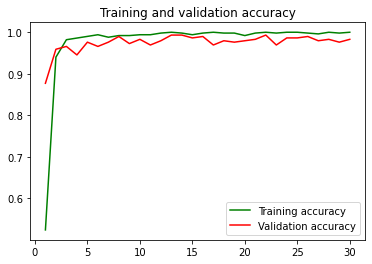

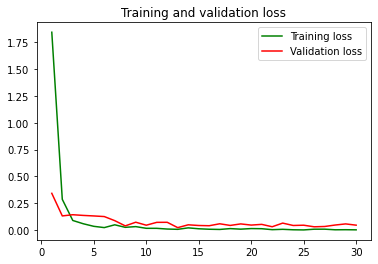

In [19]:
#visualization  mobileNet
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
model.evaluate(test_dataset)

10/10 [==============================] - 26s 3s/step - loss: 0.0360 - accuracy: 0.9829


[0.03596877679228783, 0.9829351305961609]

In [21]:
model.evaluate(train_dataset)

16/16 [==============================] - 42s 3s/step - loss: 0.0027 - accuracy: 1.0000


[0.0026624335441738367, 1.0]

In [22]:
test_dataset.class_indices

{'Candida.albicans': 0,
 'Escherichia.coli': 1,
 'Lactobacillus.casei': 2,
 'Lactobacillus.jehnsenii': 3,
 'Staphylococcus.aureus': 4}

In [23]:
# save model
model.save('mobileNet_classes9829(3)')
print ('saved')

INFO:tensorflow:Assets written to: mobileNet_classes9829(3)\assets
saved
